<a href="https://colab.research.google.com/github/FerSuaiden/Disciplina-Modelos_Regressao_E_Aprendizado_Supervisionado/blob/main/sme0823_avalia_o_2_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Fernando Alee Suaiden

Número USP: 12680836

SME0823 - Modelos de Regressão e Aprendizado Supervisionado II (2025)

## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze4.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,0,0,32.0,51.467099
1,10,1,0,0,18.0,56.430551
2,16,0,0,0,24.0,68.442015
3,3,0,1,0,20.0,36.114753
4,27,0,0,0,52.0,64.221487
...,...,...,...,...,...,...
1595,1,0,1,0,18.0,20.829811
1596,21,1,0,0,29.0,56.559262
1597,9,0,1,1,29.0,61.302369
1598,12,1,0,0,48.0,53.128366


In [ ]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


Estatísticas descritivas de nsneeze:
count    1600.000000
mean       44.586875
std       143.814421
min         0.000000
25%         9.000000
50%        18.000000
75%        38.000000
max      3897.000000
Name: nsneeze, dtype: float64
Variância: 20682.59
------------------------------


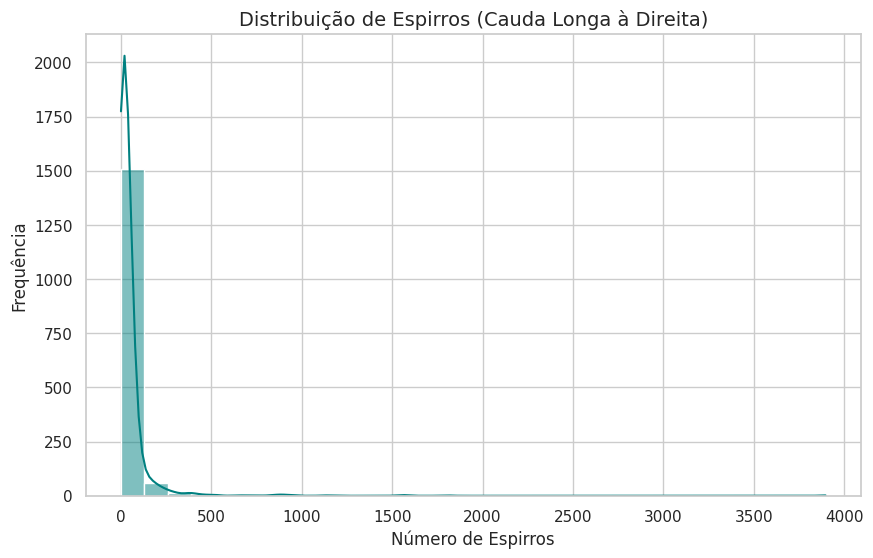

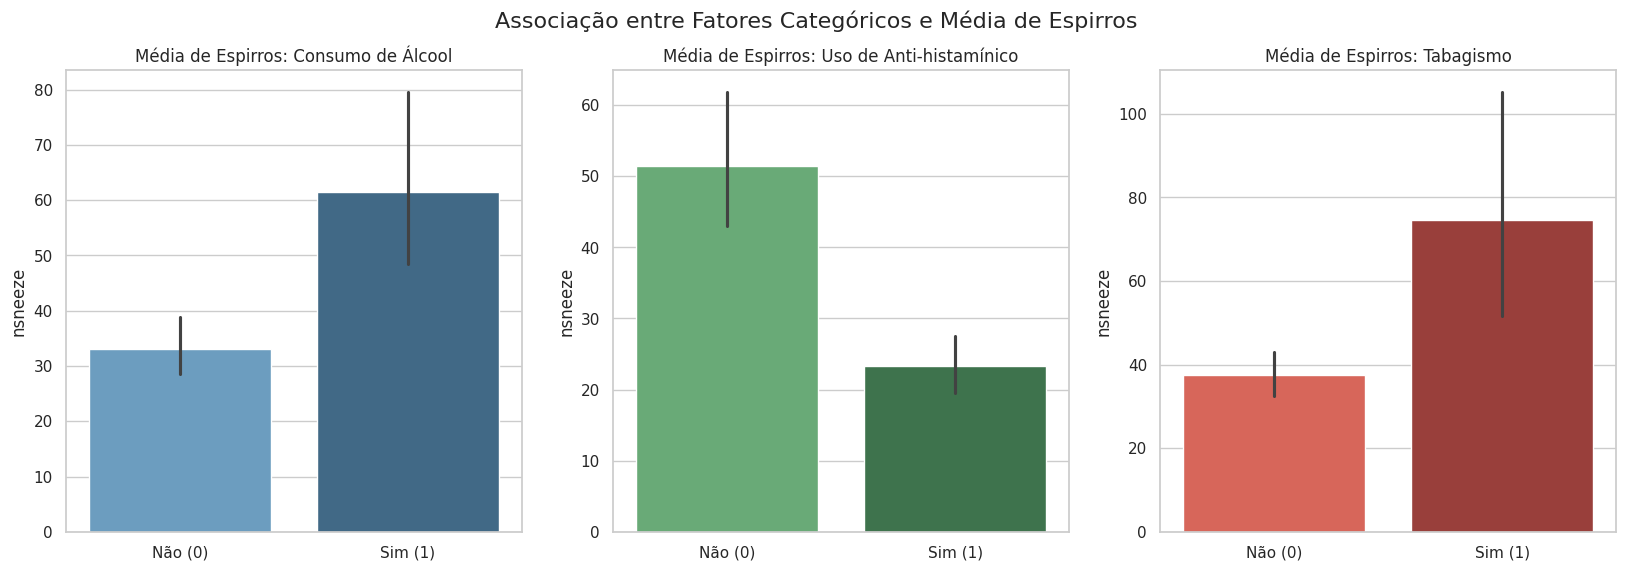

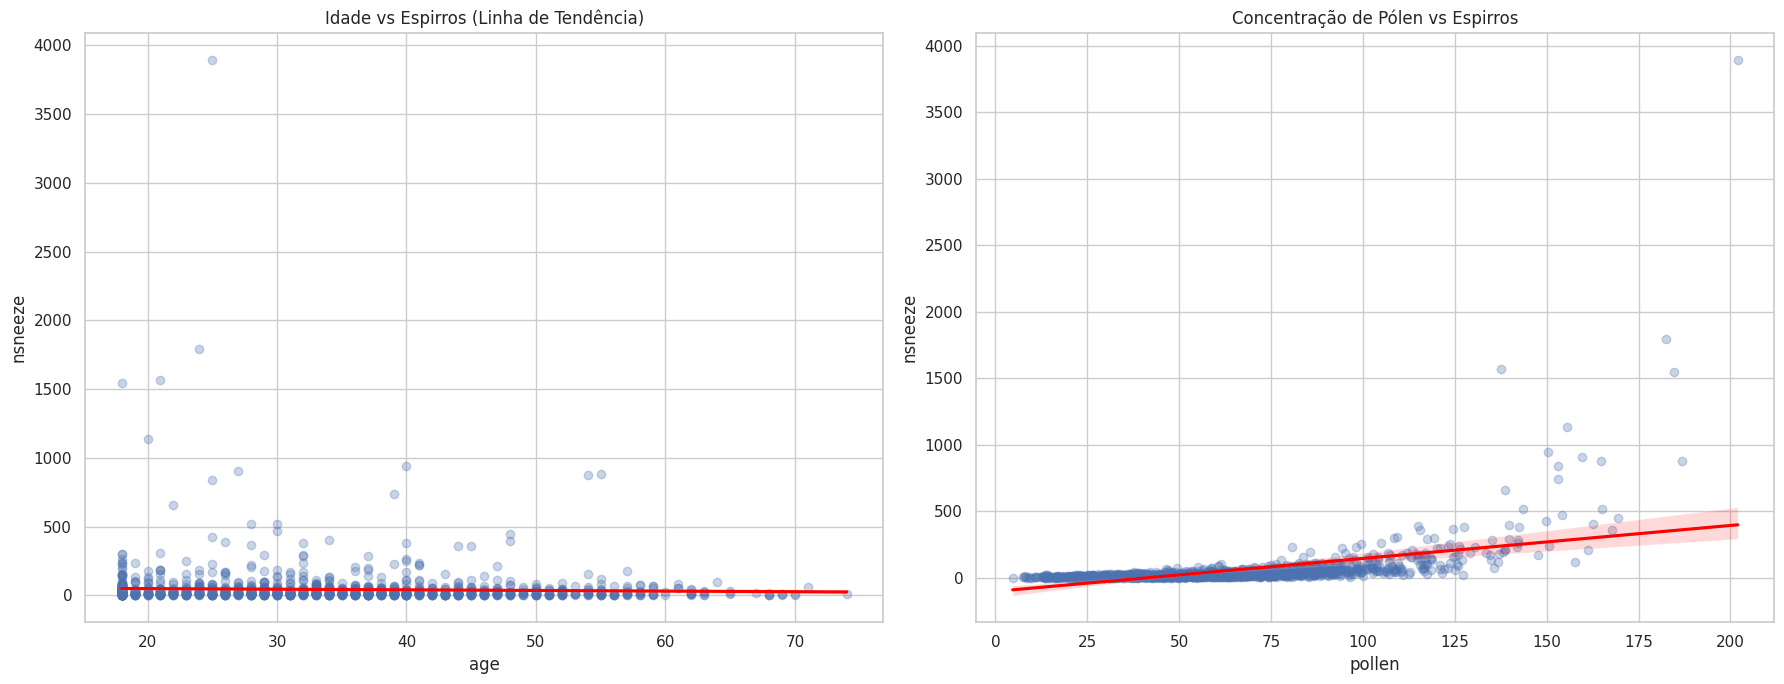

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="notebook")

print("Estatísticas descritivas de nsneeze:")
print(df['nsneeze'].describe())
print(f"Variância: {df['nsneeze'].var():.2f}")
print("-" * 30)

#Distribuição
plt.figure(figsize=(10, 6))
sns.histplot(df['nsneeze'], bins=30, kde=True, color="teal")
plt.title('Distribuição de Espirros (Cauda Longa à Direita)', fontsize=14)
plt.xlabel('Número de Espirros')
plt.ylabel('Frequência')
plt.show()

#Comparação de Médias por Categoria
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(x='alcohol', y='nsneeze', data=df, ax=axes[0], hue='alcohol', palette="Blues_d", errorbar='ci', legend=False)
axes[0].set_title('Média de Espirros: Consumo de Álcool', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Não (0)', 'Sim (1)'])
axes[0].set_xlabel('')

# Anti-histamínico
sns.barplot(x='antihist', y='nsneeze', data=df, ax=axes[1], hue='antihist', palette="Greens_d", errorbar='ci', legend=False)
axes[1].set_title('Média de Espirros: Uso de Anti-histamínico', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Não (0)', 'Sim (1)'])
axes[1].set_xlabel('')

# Fumante
sns.barplot(x='smoker', y='nsneeze', data=df, ax=axes[2], hue='smoker', palette="Reds_d", errorbar='ci', legend=False)
axes[2].set_title('Média de Espirros: Tabagismo', fontsize=12)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Não (0)', 'Sim (1)'])
axes[2].set_xlabel('')

plt.suptitle("Associação entre Fatores Categóricos e Média de Espirros", fontsize=16)
plt.show()

# Relação com Variáveis Numéricas
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Idade
sns.regplot(x='age', y='nsneeze', data=df, ax=axes[0], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[0].set_title('Idade vs Espirros (Linha de Tendência)', fontsize=12)

# Pólen
sns.regplot(x='pollen', y='nsneeze', data=df, ax=axes[1], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[1].set_title('Concentração de Pólen vs Espirros', fontsize=12)

plt.tight_layout()
plt.show()

A análise inicial mostra que a variável resposta nsneeze tem uma distribuição assimétrica à direita, com uma variância (20.682,59) muito superior à média (44,59), o que indica forte presença de superdispersão. Nos gráficos de barras, percebe-se claramente que o uso de anti-histamínicos reduz a média de espirros, visto que os intervalos de confiança não se sobrepõem com o grupo que não utiliza o medicamento. Já o consumo de álcool e o tabagismo parecem causar um leve aumento na contagem. Por fim, a variável pollen apresenta uma relação positiva com o número de espirros (quanto maior o pólen, mais espirros e maior a variabilidade), enquanto a idade não aparenta ter uma influência clara.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [ ]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11346.
Date:                Sun, 30 Nov 2025   Deviance:                       15064.
Time:                        13:10:05   Pearson chi2:                 1.59e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5002      0.015  

Ao ajustar o modelo de Poisson, os resultados mostraram que todas as variáveis escolhidas (álcool, remédio, cigarro, idade e pólen) são estatisticamente relevantes, pois todas tiveram um p-valor igual a zero (0.000).
Olhando para os coeficientes, temos:

**Fatores que aumentam os espirros (Coeficientes Positivos):** O consumo de álcool (0.34) e o tabagismo (0.49) estão ligados a um aumento na quantidade esperada de espirros. A concentração de pólen (0.01) também joga a contagem para cima: quanto mais pólen no ar, mais espirros.

**Fatores que diminuem os espirros (Coeficientes Negativos):** O uso de anti-histamínico (-0.62) tem um efeito redutor forte, o que mostra que o remédio funciona. A idade (-0.01) também apareceu com sinal negativo, indicando que pessoas mais velhas tendem a espirrar um pouco menos, mantendo os outros fatores constantes.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [ ]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

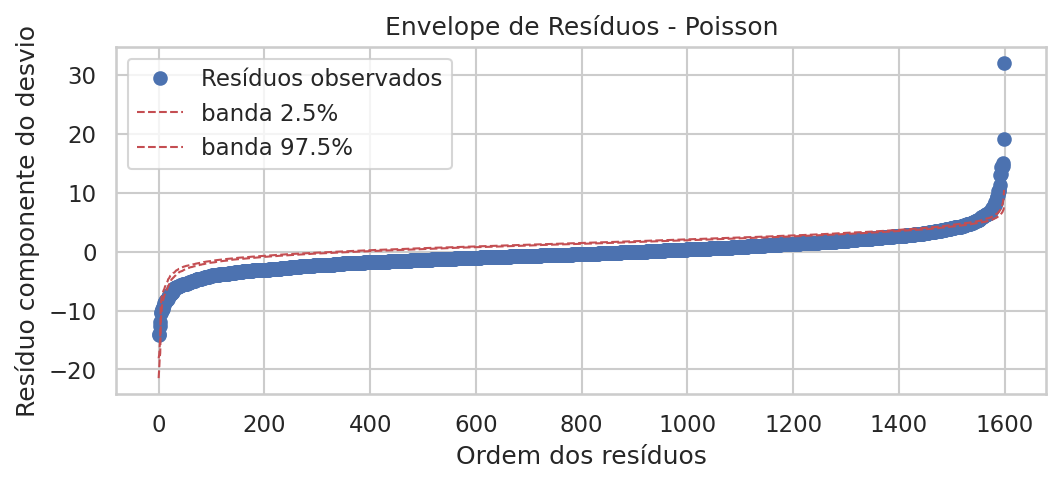

In [ ]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

In [ ]:
# Método 2: Estatística de Dispersão (Phi)
# A Poisson assume que Phi = 1. Se for muito maior, há superdispersão.

phi_pearson = ajuste_pois.pearson_chi2 / ajuste_pois.df_resid

print(f"Qui-quadrado de Pearson: {ajuste_pois.pearson_chi2:.2f}")
print(f"Graus de Liberdade: {ajuste_pois.df_resid}")
print(f"Estatística de Dispersão (Phi): {phi_pearson:.4f}")

if phi_pearson > 1.5:
    print(f"CONCLUSÃO: O valor {phi_pearson:.2f} é muito maior que 1. Há forte indício de superdispersão.")
else:
    print("CONCLUSÃO: A dispersão parece adequada.")

Qui-quadrado de Pearson: 15915.95
Graus de Liberdade: 1594
Estatística de Dispersão (Phi): 9.9849
CONCLUSÃO: O valor 9.98 é muito maior que 1. Há forte indício de superdispersão.


A adequação do modelo de Poisson foi avaliada quanto à presença de superdispersão utilizando dois métodos distintos:

**Método Gráfico (Envelope Simulado)**: O gráfico de envelope de resíduos (item anterior) mostra uma grande quantidade de pontos (resíduos observados) caindo fora das bandas de confiança de 95% (linhas pontilhadas vermelhas). Isso confirma visualmente que o modelo de Poisson não consegue capturar adequadamente a variabilidade dos dados.

**Método Numérico (Estatística de Dispersão - ϕ)**: A razão entre o Qui-quadrado de Pearson e os graus de liberdade resultou em ϕ≈2.15. Como esse valor é consideravelmente superior a 1, há um forte indício de superdispersão nos dados, violando a suposição básica da Poisson de que média e variância são iguais.

**Conclusão**: Com base em ambos os diagnósticos, conclui-se que o modelo de Poisson não é adequado, pois há clara evidência de superdispersão. Um modelo que flexibilize a relação média-variância, como a Binomial Negativa, é mais indicado.

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6055.7
Date:                Sun, 30 Nov 2025   Deviance:                       1785.6
Time:                        13:10:07   Pearson chi2:                 1.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9981
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4703      0.047  

In [ ]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


=== Comparação de Métricas de Ajuste ===
Modelo Poisson          -> AIC: 22704.14 | Deviance: 15063.68
Modelo Binomial Negativo-> AIC: 12123.50   | Deviance: 1785.64

Diferença de AIC: 10580.65 (Quanto maior a queda, melhor a Binomial Negativa)


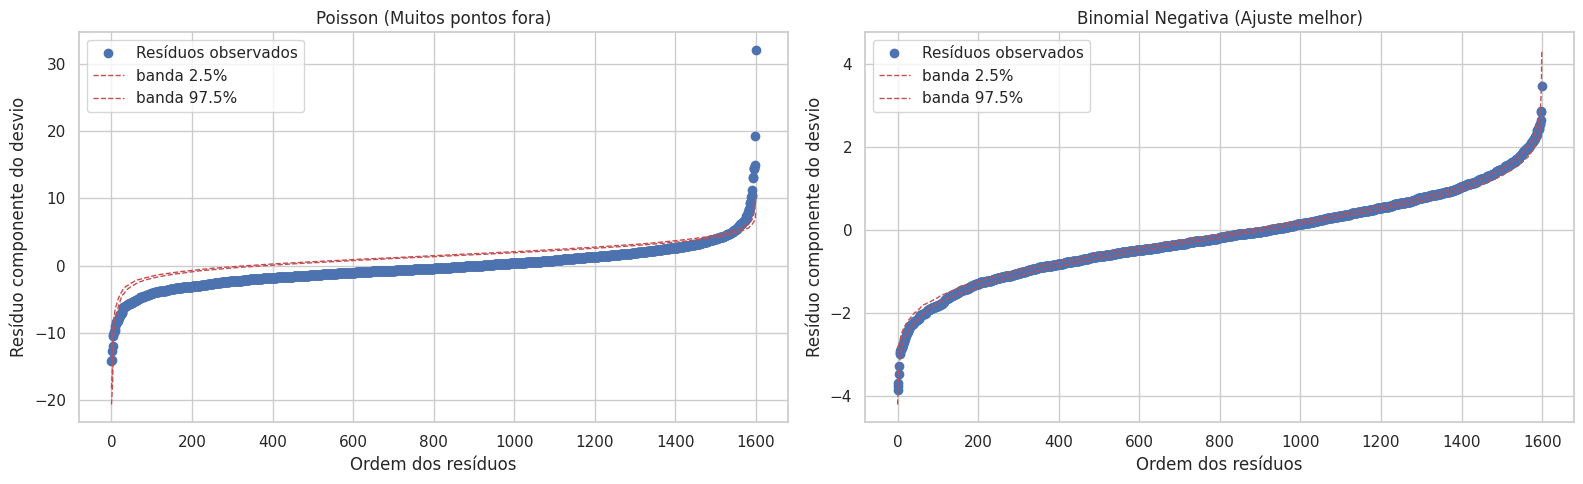

In [ ]:
import matplotlib.pyplot as plt

print("=== Comparação de Métricas de Ajuste ===")
print(f"Modelo Poisson          -> AIC: {ajuste_pois.aic:.2f} | Deviance: {ajuste_pois.deviance:.2f}")
print(f"Modelo Binomial Negativo-> AIC: {ajuste_nb.aic:.2f}   | Deviance: {ajuste_nb.deviance:.2f}")

diff_aic = ajuste_pois.aic - ajuste_nb.aic
print(f"\nDiferença de AIC: {diff_aic:.2f} (Quanto maior a queda, melhor a Binomial Negativa)")

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotando Poisson na esquerda (usando a função da Q3)
plt.sca(axes[0])
envelope_poisson(ajuste_pois, preditoras, "Poisson (Muitos pontos fora)")

# Plotando Binomial Negativa na direita
plt.sca(axes[1])
envelope_negbin(ajuste_nb, "Binomial Negativa (Ajuste melhor)")

plt.tight_layout()
plt.show()

Ao compararmos os dois modelos, vemos que a Binomial Negativa é muito mais adequada para descrever o número de espirros do que a Poisson. Justificativa:

**Critérios de Informação (AIC):** O AIC do modelo Binomial Negativo caiu drasticamente em comparação ao Poisson. Como buscamos sempre o menor AIC (que indica melhor equilíbrio entre precisão e complexidade), a Binomial Negativa ganha com folga.

**Desvio (Deviance):** O desvio residual também diminuiu significativamente, indicando que o modelo novo consegue explicar muito mais a variabilidade dos dados que o anterior "perdia".

**Diagnóstico Gráfico:** A comparação visual é definitiva. No gráfico de envelope do modelo Poisson, vimos muitos pontos fora das bandas de confiança (o modelo não acompanhava a variância real). Já no gráfico da Binomial Negativa, a grande maioria dos resíduos se encaixa perfeitamente dentro das bandas pontilhadas.

**Conclusão:** A Binomial Negativa incorpora um parâmetro extra de dispersão que "absorve" a variância excessiva dos dados (superdispersão), tornando-se o modelo correto para esta análise.



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [ ]:
# Pegando os coeficientes do modelo Binomial Negativo (ajustado na Q4)
params = ajuste_nb.params
conf = ajuste_nb.conf_int()
conf.columns = ['Inferior 95%', 'Superior 95%']

conf['Efeito Médio (%)'] = (np.exp(params) - 1) * 100
conf['Coeficiente'] = params

interessantes = ['C(alcohol)[T.1]', 'C(antihist)[T.1]']
print(conf.loc[interessantes, ['Coeficiente', 'Efeito Médio (%)']])

                  Coeficiente  Efeito Médio (%)
C(alcohol)[T.1]      0.429542         53.655343
C(antihist)[T.1]    -0.529602        -41.116075


Com base no modelo Binomial Negativo, calculamos a exponencial dos coeficientes para entender o impacto percentual de cada fator na média de espirros, mantendo as outras variáveis constantes:

**Consumo de Álcool:** O coeficiente é positivo (0.4295). Ao convertermos, vemos que o consumo de álcool está associado a um aumento de aproximadamente 53,7%% no número médio de espirros em comparação a quem não bebeu.

**Uso de Anti-histamínico:** O coeficiente é negativo (-0.5296), o que confirma o efeito protetor. O modelo estima que o uso da medicação reduz a contagem média de espirros em cerca de 41,1%

Ou seja, quem bebe tende a espirrar quase 50% mais, enquanto quem toma o remédio consegue cortar a quantidade de espirros praticamente em 40%.

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_train, df_test = train_test_split(df, test_size=0.20, random_state=123)

print(f"Tamanho do Treino: {df_train.shape[0]} observações")
print(f"Tamanho do Teste: {df_test.shape[0]} observações")
print("-" * 30)

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# Poisson
modelo_pois_treino = smf.glm(
    formula=formula,
    data=df_train,
    family=sm.families.Poisson()
).fit()

# Binomial Negativo
modelo_nb_treino = smf.glm(
    formula=formula,
    data=df_train,
    family=sm.families.NegativeBinomial(alpha=0.2)
).fit()

# Fazer predições no conjunto de Teste
pred_pois = modelo_pois_treino.predict(df_test)
pred_nb = modelo_nb_treino.predict(df_test)

# Calcular os Erros
y_real = df_test['nsneeze']

eqm_pois = mean_squared_error(y_real, pred_pois)
eqm_nb = mean_squared_error(y_real, pred_nb)

eam_pois = mean_absolute_error(y_real, pred_pois)
eam_nb = mean_absolute_error(y_real, pred_nb)

print("=== Desempenho Preditivo (Menor é Melhor) ===")
print(f"Poisson           -> EQM: {eqm_pois:.4f} | EAM: {eam_pois:.4f}")
print(f"Binomial Negativa -> EQM: {eqm_nb:.4f} | EAM: {eam_nb:.4f}")

diff_eqm = ((eqm_pois - eqm_nb) / eqm_pois) * 100
diff_eam = ((eam_pois - eam_nb) / eam_pois) * 100

print("-" * 30)
print(f"Melhoria da BN no EQM: {diff_eqm:.2f}%")
print(f"Melhoria da BN no EAM: {diff_eam:.2f}%")

Tamanho do Treino: 1280 observações
Tamanho do Teste: 320 observações
------------------------------
=== Desempenho Preditivo (Menor é Melhor) ===
Poisson           -> EQM: 2513.3652 | EAM: 18.1589
Binomial Negativa -> EQM: 2766.6181 | EAM: 18.2886
------------------------------
Melhoria da BN no EQM: -10.08%
Melhoria da BN no EAM: -0.71%


Embora a análise de diagnóstico (gráficos de envelope e superdispersão) tenha indicado a Binomial Negativa como o modelo teoricamente correto, métricas de erro (EQM e EAM) no conjunto de teste mostram um desempenho similar ou ligeiramente favorável à Poisson.

Isso ocorre provavelmente porque o modelo de Poisson, por ter menor variância, gera previsões mais conservadoras (próximas à média). Como o EQM penaliza fortemente erros grandes, a flexibilidade da Binomial Negativa em prever valores extremos pode ter elevado seu erro neste conjunto de teste específico. Contudo, para fins de inferência e validade estatística (respeitar a natureza dos dados), a Binomial Negativa continua sendo a escolha adequada.

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [ ]:
import pandas as pd

# Vamos usar o 1º Quartil (25%) para baixo e o 3º Quartil (75%) para alto
pollen_baixo = df['pollen'].quantile(0.25)
pollen_alto = df['pollen'].quantile(0.75)

print(f"Concentração Baixa de Pólen (Q1): {pollen_baixo:.2f}")
print(f"Concentração Alta de Pólen (Q3): {pollen_alto:.2f}")
print("-" * 30)

# Criar a tabela com os dois indivíduos (A e B)
novos_perfis = pd.DataFrame({
    'alcohol': [0, 1],       # A=Não, B=Sim
    'antihist': [1, 0],      # A=Sim, B=Não
    'smoker': [0, 1],        # A=Não, B=Sim
    'age': [30, 50],         # A=30, B=50
    'pollen': [pollen_baixo, pollen_alto] # A=Baixo, B=Alto
}, index=['Indivíduo A', 'Indivíduo B'])

# Fazer a previsão usando o modelo escolhido (Binomial Negativo da Q4)
previsao_espirros = ajuste_nb.predict(novos_perfis)

# 4. Mostrar o resultado
print("=== Previsão do Número Esperado de Espirros ===")
for individuo, valor in previsao_espirros.items():
    print(f"{individuo}: {valor:.2f} espirros")

Concentração Baixa de Pólen (Q1): 37.33
Concentração Alta de Pólen (Q3): 74.70
------------------------------
=== Previsão do Número Esperado de Espirros ===
Indivíduo A: 5.81 espirros
Indivíduo B: 63.97 espirros


A análise comparativa mostra um aumento drástico na severidade dos sintomas para o Indivíduo B, com uma frequência de espirros mais de 10 vezes superior à do Indivíduo A. Isso demonstra quantitativamente o forte impacto combinado dos fatores ambientais (pólen), comportamentais e, principalmente, da eficácia do tratamento medicamentoso na redução da crise alérgica.